# Visualize for dataset and domain

In [51]:
import pandas as pd

def get_metrics(train_text_paths, val_text_paths):
    training_loss = {
        'fold_0': [],
        'fold_1': [],
        'fold_2': []
    }
    training_acc = {
        'fold_0': [],
        'fold_1': [],
        'fold_2': []
    }
    for text in train_text_paths:
        k_fold = text.split("/")[-1].split("_")[3]
        f = open(text, "r")
        for index, x in enumerate(f):
            if index == 0:
                continue
            loss = float(x.replace("\n", "").split(", ")[0])
            acc = float(x.replace("\n", "").split(", ")[1])
            if k_fold == "0":
                training_loss["fold_0"].append(loss)
                training_acc["fold_0"].append(acc)
            elif k_fold == "1":
                training_loss["fold_1"].append(loss)
                training_acc["fold_1"].append(acc)
            else:
                training_loss["fold_2"].append(loss)
                training_acc["fold_2"].append(acc)

    val_loss = {
        'fold_0': [],
        'fold_1': [],
        'fold_2': []
    }

    val_acc = {
        'fold_0': [],
        'fold_1': [],
        'fold_2': []
    }

    for text in val_text_paths:
        k_fold = text.split("/")[-1].split("_")[3]
        f = open(text, "r")
        for index, x in enumerate(f):
            if index == 0:
                continue
            loss = float(x.replace("\n", "").split(", ")[0])
            acc = float(x.replace("\n", "").split(", ")[1])
            if k_fold == "0":
                val_loss["fold_0"].append(loss)
                val_acc["fold_0"].append(acc)
            elif k_fold == "1":
                val_loss["fold_1"].append(loss)
                val_acc["fold_1"].append(acc)
            else:
                val_loss["fold_2"].append(loss)
                val_acc["fold_2"].append(acc)
    
    
    df_result_training_loss = pd.DataFrame(training_loss)
    df_result_val_loss = pd.DataFrame(val_loss)
    
    df_result_training_acc = pd.DataFrame(training_acc)
    df_result_val_acc = pd.DataFrame(val_acc)
    
    return [df_result_training_loss, df_result_val_loss, df_result_training_acc, df_result_val_acc]

In [59]:
import matplotlib.pyplot as plt
import glob


# dataset_names = "Office"
# domain_names = ["amazon", "dslr", "webcam"]

dataset_names = "Office-Home"
domain_names = ["Art", "Clipart", "Product", "Real World"]
dictionary_metrics = {domain_name: None for domain_name in domain_names}

In [60]:
for domain in dictionary_metrics:
    train_paths = f"/Users/tuananh/tuananh/domain_calibration/experiments/{dataset_names}/{domain}/*_train_*.txt"
    train_text_paths = glob.glob(train_paths)

    val_paths = f"/Users/tuananh/tuananh/domain_calibration/experiments/{dataset_names}/{domain}/*_val_*.txt"
    val_text_paths = glob.glob(val_paths)
    
    dictionary_metrics[domain] = get_metrics(train_text_paths, val_text_paths)

In [61]:
def visualize(dictionary_metrics, name_domain, path_save):
    fig = plt.figure(figsize=(10, 10))
    fig.suptitle(f'Baseline model in domain: {name_domain}')
    fig.tight_layout()
    columns = 2
    rows = 2

    fig.add_subplot(rows, columns, 1)
    plt.plot(dictionary_metrics[name_domain][0]["fold_0"])
    plt.plot(dictionary_metrics[name_domain][0]["fold_1"])
    plt.plot(dictionary_metrics[name_domain][0]["fold_2"])
    plt.title('Training Loss')
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['fold_1', 'fold_2', 'fold_3'], loc='upper left')

    fig.add_subplot(rows, columns, 2)
    plt.plot(dictionary_metrics[name_domain][1]["fold_0"])
    plt.plot(dictionary_metrics[name_domain][1]["fold_1"])
    plt.plot(dictionary_metrics[name_domain][1]["fold_2"])
    plt.title('Validation Loss')
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['fold_1', 'fold_2', 'fold_3'], loc='upper left')

    fig.add_subplot(rows, columns, 3)
    plt.plot(dictionary_metrics[name_domain][2]["fold_0"])
    plt.plot(dictionary_metrics[name_domain][2]["fold_1"])
    plt.plot(dictionary_metrics[name_domain][2]["fold_2"])
    plt.title('Training Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('epoch')
    plt.legend(['fold_1', 'fold_2', 'fold_3'], loc='upper left')

    fig.add_subplot(rows, columns, 4)
    plt.plot(dictionary_metrics[name_domain][3]["fold_0"])
    plt.plot(dictionary_metrics[name_domain][3]["fold_1"])
    plt.plot(dictionary_metrics[name_domain][3]["fold_2"])
    plt.title('Validation Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('epoch')
    plt.legend(['fold_1', 'fold_2', 'fold_3'], loc='upper left')
    
    plt.savefig(path_save)
    
    plt.show()

In [62]:
import os
path_result_visualize = f"/Users/tuananh/tuananh/domain_calibration/experiments/{dataset_names}/result_visualize/"
if not os.path.isdir(path_result_visualize):
    os.makedirs(path_result_visualize)

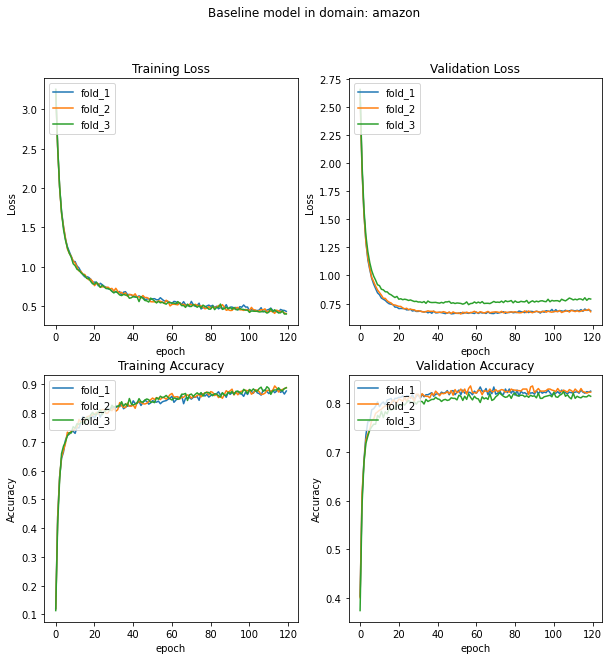

In [56]:
domain_name = "amazon"
path_save = f"/Users/tuananh/tuananh/domain_calibration/experiments/{dataset_names}/result_visualize/{domain_name}.png"
visualize(dictionary_metrics, domain_name, path_save)

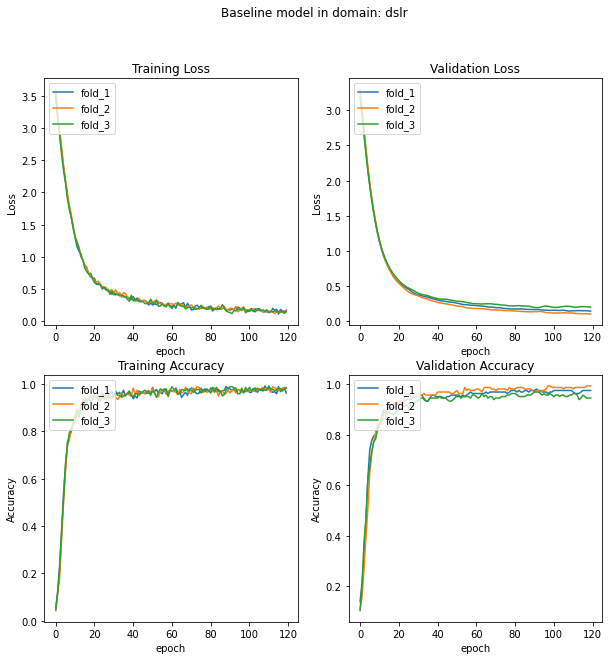

In [57]:
domain_name = "dslr"
path_save = f"/Users/tuananh/tuananh/domain_calibration/experiments/{dataset_names}/result_visualize/{domain_name}.png"
visualize(dictionary_metrics, domain_name, path_save)

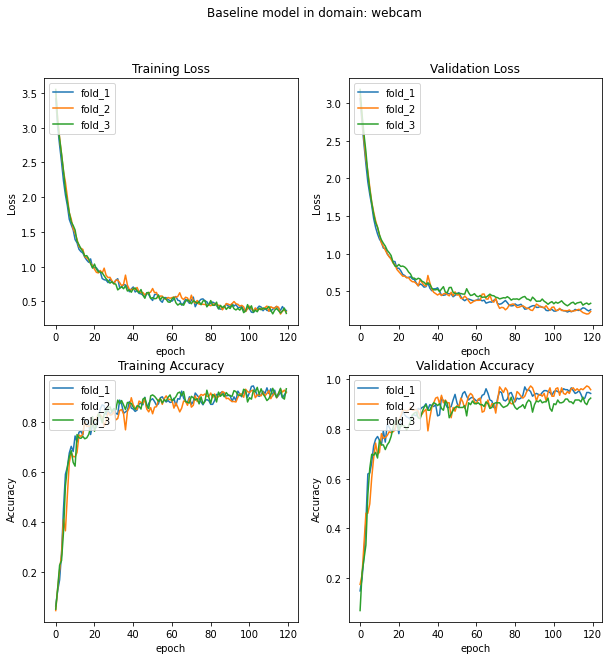

In [58]:
domain_name = "webcam"
path_save = f"/Users/tuananh/tuananh/domain_calibration/experiments/{dataset_names}/result_visualize/{domain_name}.png"
visualize(dictionary_metrics, domain_name, path_save)

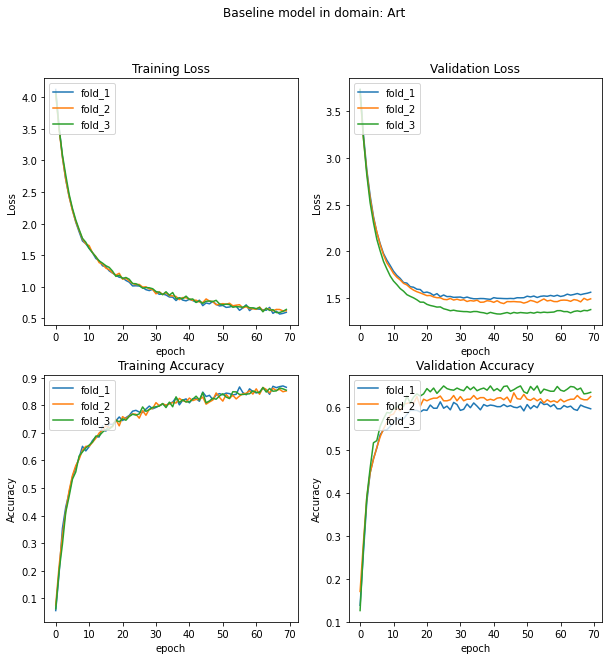

In [63]:
domain_name = "Art"
path_save = f"/Users/tuananh/tuananh/domain_calibration/experiments/{dataset_names}/result_visualize/{domain_name}.png"
visualize(dictionary_metrics, domain_name, path_save)

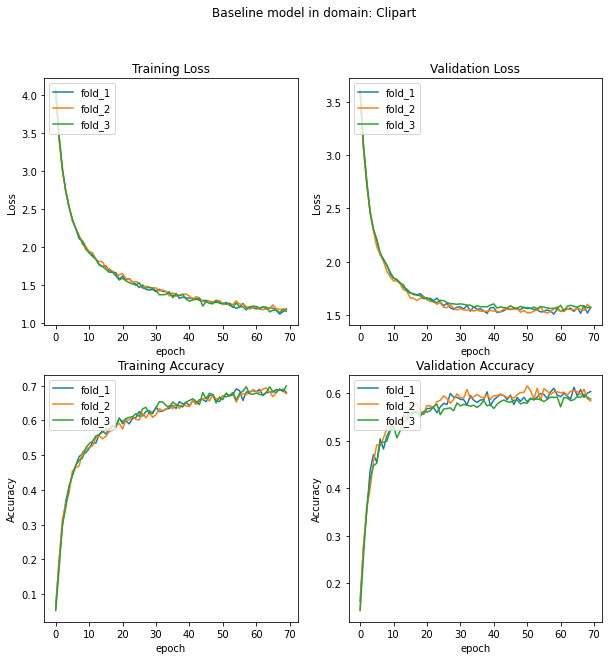

In [64]:
domain_name = "Clipart"
path_save = f"/Users/tuananh/tuananh/domain_calibration/experiments/{dataset_names}/result_visualize/{domain_name}.png"
visualize(dictionary_metrics, domain_name, path_save)

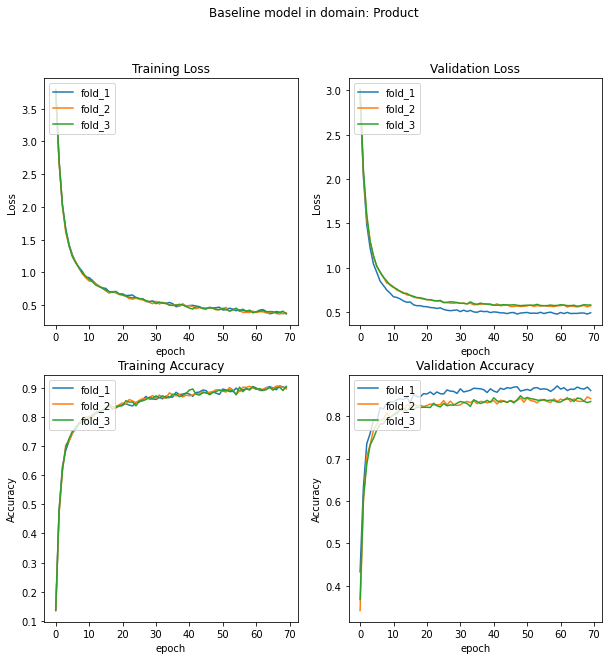

In [65]:
domain_name = "Product"
path_save = f"/Users/tuananh/tuananh/domain_calibration/experiments/{dataset_names}/result_visualize/{domain_name}.png"
visualize(dictionary_metrics, domain_name, path_save)

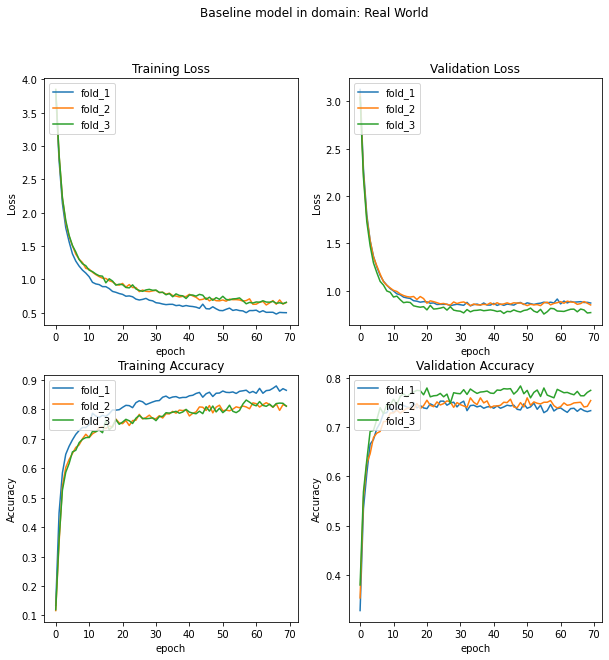

In [66]:
domain_name = "Real World"
path_save = f"/Users/tuananh/tuananh/domain_calibration/experiments/{dataset_names}/result_visualize/{domain_name}.png"
visualize(dictionary_metrics, domain_name, path_save)

# Report Accuracy for K-Fold

In [67]:
import pandas as pd

def get_metrics(train_text_paths, val_text_paths):
    training_loss = {
        'fold_0': [],
        'fold_1': [],
        'fold_2': []
    }
    training_acc = {
        'fold_0': [],
        'fold_1': [],
        'fold_2': []
    }
    for text in train_text_paths:
        k_fold = text.split("/")[-1].split("_")[3]
        f = open(text, "r")
        for index, x in enumerate(f):
            if index == 0:
                continue
            loss = float(x.replace("\n", "").split(", ")[0])
            acc = float(x.replace("\n", "").split(", ")[1])
            if k_fold == "0":
                training_loss["fold_0"].append(loss)
                training_acc["fold_0"].append(acc)
            elif k_fold == "1":
                training_loss["fold_1"].append(loss)
                training_acc["fold_1"].append(acc)
            else:
                training_loss["fold_2"].append(loss)
                training_acc["fold_2"].append(acc)

    val_loss = {
        'fold_0': [],
        'fold_1': [],
        'fold_2': []
    }

    val_acc = {
        'fold_0': [],
        'fold_1': [],
        'fold_2': []
    }

    for text in val_text_paths:
        k_fold = text.split("/")[-1].split("_")[3]
        f = open(text, "r")
        for index, x in enumerate(f):
            if index == 0:
                continue
            loss = float(x.replace("\n", "").split(", ")[0])
            acc = float(x.replace("\n", "").split(", ")[1])
            if k_fold == "0":
                val_loss["fold_0"].append(loss)
                val_acc["fold_0"].append(acc)
            elif k_fold == "1":
                val_loss["fold_1"].append(loss)
                val_acc["fold_1"].append(acc)
            else:
                val_loss["fold_2"].append(loss)
                val_acc["fold_2"].append(acc)
    
    
    df_result_training_loss = pd.DataFrame(training_loss)
    df_result_val_loss = pd.DataFrame(val_loss)
    
    df_result_training_acc = pd.DataFrame(training_acc)
    df_result_val_acc = pd.DataFrame(val_acc)
    
    return [df_result_training_loss, df_result_val_loss, df_result_training_acc, df_result_val_acc]

In [73]:
import matplotlib.pyplot as plt
import glob
import numpy as np

# dataset_name = "Office"
# domain_names = ["amazon", "dslr", "webcam"]
dataset_name = "Office-Home"
domain_names = ["Art", "Clipart", "Product", "Real World"]
dictionary_metrics = {domain_name: None for domain_name in domain_names}

In [74]:
for domain in dictionary_metrics:
    train_paths = f"/Users/tuananh/tuananh/domain_calibration/experiments/{dataset_name}/{domain}/*_train_*.txt"
    train_text_paths = glob.glob(train_paths)

    val_paths = f"/Users/tuananh/tuananh/domain_calibration/experiments/{dataset_name}/{domain}/*_val_*.txt"
    val_text_paths = glob.glob(val_paths)
    
    dictionary_metrics[domain] = get_metrics(train_text_paths, val_text_paths)

In [75]:
def report_result(df):
    keys = ["fold_0", "fold_1", "fold_2"]
    optimize_values = []
    for key in keys:
        optimize_values.append(df[key].max())
    
    return optimize_values

In [76]:
# tap training
dictionary = {
    "Domain Name": [],
    "Fold-1": [],
    "Fold-2": [],
    "Fold-3": [],
    "Mean Accuracy": [],
    "Standard Deviation": [],
}
for domain_name in domain_names:
    optimize_values = report_result(dictionary_metrics[domain_name][2])
    mean_value = np.mean(optimize_values)
    std_values = np.std(optimize_values)
    
    dictionary['Domain Name'].append(domain_name)
    dictionary['Mean Accuracy'].append(mean_value)
    dictionary['Standard Deviation'].append(std_values)
    dictionary['Fold-1'].append(optimize_values[0])
    dictionary['Fold-2'].append(optimize_values[1])
    dictionary['Fold-3'].append(optimize_values[1])

path_save = f"/Users/tuananh/tuananh/domain_calibration/experiments/{dataset_name}/result_visualize/train_metrics.csv"
pd.DataFrame(dictionary).to_csv(path_save, index=False)
pd.DataFrame(dictionary)

,Domain Name,Fold-1,Fold-2,Fold-3,Mean Accuracy,Standard Deviation
0,Art,0.869592,0.864030,0.864030,0.865884,0.002622
1,Clipart,0.690722,0.693127,0.693127,0.694273,0.003463
2,Product,0.906387,0.906049,0.906049,0.905835,0.000560
3,Real World,0.878444,0.821687,0.821687,0.843589,0.024915


In [77]:
# tap validation
dictionary = {
    "Domain Name": [],
    "Fold-1": [],
    "Fold-2": [],
    "Fold-3": [],
    "Mean Accuracy": [],
    "Standard Deviation": [],
}
for domain_name in domain_names:
    optimize_values = report_result(dictionary_metrics[domain_name][3])
    mean_value = np.mean(optimize_values)
    std_values = np.std(optimize_values)
    
    dictionary['Domain Name'].append(domain_name)
    dictionary['Mean Accuracy'].append(mean_value)
    dictionary['Standard Deviation'].append(std_values)
    dictionary['Fold-1'].append(optimize_values[0])
    dictionary['Fold-2'].append(optimize_values[1])
    dictionary['Fold-3'].append(optimize_values[1])

path_save = f"/Users/tuananh/tuananh/domain_calibration/experiments/{dataset_name}/result_visualize/val_metrics.csv"
pd.DataFrame(dictionary).to_csv(path_save, index=False)
pd.DataFrame(dictionary)

,Domain Name,Fold-1,Fold-2,Fold-3,Mean Accuracy,Standard Deviation
0,Art,0.611867,0.632880,0.632880,0.631232,0.015184
1,Clipart,0.612371,0.615120,0.615120,0.608247,0.007856
2,Product,0.870946,0.845270,0.845270,0.854695,0.011540
3,Real World,0.752237,0.758953,0.758953,0.764749,0.013233


# Caculate ECE

In [39]:
import pandas as pd
import glob
import json
import torch

import numpy as np
from netcal.scaling import TemperatureScaling
from netcal.metrics import ECE

def caculate_ecg_not_calibrate(df):
    keys = ["fold_0", "fold_1", "fold_2"]
    ece_values = []
    for index, key in enumerate(keys):
        condition = df.kfold == index
        val_logits = np.vstack([json.loads(x) for x in df[condition]['logit'].values])
        val_ground_truth = df[condition]["classes"].values
        val_confidences = torch.softmax(torch.from_numpy(val_logits), 1).numpy()
        
        n_bins = 10
        ece = ECE(n_bins)
        uncalibrated_score = ece.measure(val_confidences, val_ground_truth)

        ece_values.append(uncalibrated_score)
        
    return ece_values


def caculate_ecg_calibrate(df):
    keys = ["fold_0", "fold_1", "fold_2"]
    ece_values = []
    for index, key in enumerate(keys):
        condition = df.kfold == index

        train_logits = np.vstack([json.loads(x) for x in df[~condition]['logit'].values])
        train_ground_truth = df[~condition]["classes"].values
        train_confidences = torch.softmax(torch.from_numpy(train_logits), 1).numpy()

        val_logits = np.vstack([json.loads(x) for x in df[condition]['logit'].values])
        val_ground_truth = df[condition]["classes"].values
        val_confidences = torch.softmax(torch.from_numpy(val_logits), 1).numpy()
        
        temperature = TemperatureScaling(vi_epochs=2000)
        temperature.fit(train_confidences, train_ground_truth)
        val_calibrated = temperature.transform(val_confidences)
        
        n_bins = 10
        ece = ECE(n_bins)
        calibrated_score = ece.measure(val_calibrated, val_ground_truth)

        ece_values.append(calibrated_score)
        
    return ece_values
        

In [155]:
domain_names = ["amazon", "dslr", "webcam"]

dictionary = {
    "Domain Name": [],
    "Fold-1": [],
    "Fold-2": [],
    "Fold-3": [],
    "Mean ECE": [],
    "Standard Deviation": [],
}

for domain_name in domain_names:
    path_csv = f"/Users/tuananh/tuananh/domain_calibration/experiments/Office/{domain_name}/resnet_34_kfold_val_logits.csv"
    ece_values = caculate_ecg_not_calibrate(
        pd.read_csv(path_csv)
    )
    
    mean_value = np.mean(ece_values)
    std_values = np.std(ece_values)
    
    dictionary['Domain Name'].append(domain_name)
    dictionary['Mean ECE'].append(mean_value)
    dictionary['Standard Deviation'].append(std_values)
    dictionary['Fold-1'].append(ece_values[0])
    dictionary['Fold-2'].append(ece_values[1])
    dictionary['Fold-3'].append(ece_values[2])
pd.DataFrame(dictionary)

,Domain Name,Fold-1,Fold-2,Fold-3,Mean ECE,Standard Deviation
0,amazon,0.022135,0.033405,0.032932,0.029491,0.005205
1,dslr,0.085947,0.092779,0.098134,0.092286,0.004988
2,webcam,0.139420,0.159829,0.135756,0.145002,0.010591


In [156]:
# calibrated
domain_names = ["amazon", "dslr", "webcam"]

dictionary = {
    "Domain Name": [],
    "Fold-1": [],
    "Fold-2": [],
    "Fold-3": [],
    "Mean ECE": [],
    "Standard Deviation": [],
}

for domain_name in domain_names:
    path_csv = f"/Users/tuananh/tuananh/domain_calibration/experiments/Office/{domain_name}/resnet_34_kfold_val_logits.csv"
    ece_values = caculate_ecg_calibrate(
        pd.read_csv(path_csv)
    )
    
    mean_value = np.mean(ece_values)
    std_values = np.std(ece_values)
    
    dictionary['Domain Name'].append(domain_name)
    dictionary['Mean ECE'].append(mean_value)
    dictionary['Standard Deviation'].append(std_values)
    dictionary['Fold-1'].append(ece_values[0])
    dictionary['Fold-2'].append(ece_values[1])
    dictionary['Fold-3'].append(ece_values[2])

pd.DataFrame(dictionary)

,Domain Name,Fold-1,Fold-2,Fold-3,Mean ECE,Standard Deviation
0,amazon,0.039161,0.071774,0.025731,0.045555,0.019333
1,dslr,0.031101,0.018889,0.029684,0.026558,0.005454
2,webcam,0.027661,0.026124,0.040023,0.031269,0.006221


# Caculate ECE with multi domain

In [78]:
import pandas as pd
import glob
import json
import torch

import numpy as np
from netcal.scaling import TemperatureScaling
from netcal.metrics import ECE

def caculate_ece_not_calibrate(df, domain_names):
    ece_values = {}
    for index, key in enumerate(domain_names):
        condition = (df.domain_name == key) & (df.phase == "val")
        
        val_logits = np.vstack([json.loads(x) for x in df[condition]['logit'].values])
        val_ground_truth = df[condition]["classes"].values
        val_confidences = torch.softmax(torch.from_numpy(val_logits), 1).numpy()
        
        n_bins = 10
        ece = ECE(n_bins)
        uncalibrated_score = ece.measure(val_confidences, val_ground_truth)

        ece_values[key] = uncalibrated_score
        
    return ece_values


def calibrate_model(df, domain_name):
    condition_domain = (df.domain_name == domain_name)
    condition_phase_train = (df.phase == "train")
    condition_phase_val = (df.phase == "val")

    train_logits = np.vstack([json.loads(x) for x in df[condition_domain & condition_phase_train]['logit'].values])
    train_ground_truth = df[condition_domain & condition_phase_train]["classes"].values
    train_confidences = torch.softmax(torch.from_numpy(train_logits), 1).numpy()

    val_logits = np.vstack([json.loads(x) for x in df[condition_domain & condition_phase_val]['logit'].values])
    val_ground_truth = df[condition_domain & condition_phase_val]["classes"].values
    val_confidences = torch.softmax(torch.from_numpy(val_logits), 1).numpy()

    temperature = TemperatureScaling(vi_epochs=2000)
    temperature.fit(train_confidences, train_ground_truth)
    
    return temperature


def caculate_ece_calibrate(df, domain_names, temperature):
    ece_values = {}
    for index, key in enumerate(domain_names):
        condition_domain = (df.domain_name == key)
        condition_phase_train = (df.phase == "train")
        condition_phase_val = (df.phase == "val")
        
        train_logits = np.vstack([json.loads(x) for x in df[condition_domain & condition_phase_train]['logit'].values])
        train_ground_truth = df[condition_domain & condition_phase_train]["classes"].values
        train_confidences = torch.softmax(torch.from_numpy(train_logits), 1).numpy()

        val_logits = np.vstack([json.loads(x) for x in df[condition_domain & condition_phase_val]['logit'].values])
        val_ground_truth = df[condition_domain & condition_phase_val]["classes"].values
        val_confidences = torch.softmax(torch.from_numpy(val_logits), 1).numpy()
        
        val_calibrated = temperature.transform(val_confidences)
        
        n_bins = 10
        ece = ECE(n_bins)
        calibrated_score = ece.measure(val_calibrated, val_ground_truth)

        ece_values[key] = calibrated_score
        
    return ece_values

In [81]:
# dataset_name = "Office"
# domain_names = ["webcam", "amazon", "dslr"]

dataset_name = "Office-Home"
domain_names = ["Art", "Clipart", "Product", "Real World"]

path_save = f"/Users/tuananh/tuananh/domain_calibration/experiments/{dataset_name}/result_visualize/"

with pd.ExcelWriter(f'{path_save}/ece_not_calibrate_results_logits.xlsx') as writer:
    for i in range(3):
        dictionary = {
            "Domain Name": [],
        }

        for domain_name in domain_names:
            dictionary[domain_name] = []

        for domain_name in domain_names:
            path_excel = f"/Users/tuananh/tuananh/domain_calibration/experiments/{dataset_name}/{domain_name}/resnet_34_kfold_val_logits.xlsx"
            dictionary['Domain Name'].append(domain_name)
            df = pd.read_excel(path_excel, sheet_name=f"kfold_{i}")
            ece_values = caculate_ece_not_calibrate(df, domain_names)
            for name in domain_names:
                dictionary[name].append(ece_values[name])
        
        pd.DataFrame(dictionary).to_excel(writer, sheet_name=f'kfold_{i}', index=False)
    

In [82]:
with pd.ExcelWriter(f'{path_save}/ece_calibrate_results_logits.xlsx') as writer:
    for i in range(3):
        dictionary = {
            "Domain Name": [],
        }

        for domain_name in domain_names:
            dictionary[domain_name] = []

        for domain_name in domain_names:
            path_excel = f"/Users/tuananh/tuananh/domain_calibration/experiments/{dataset_name}/{domain_name}/resnet_34_kfold_val_logits.xlsx"
            dictionary['Domain Name'].append(domain_name)
            df = pd.read_excel(path_excel, sheet_name=f"kfold_{i}")
            temperature = calibrate_model(df, domain_name)
            
            ece_values = caculate_ece_calibrate(df, domain_names, temperature)
            for name in domain_names:
                dictionary[name].append(ece_values[name])
        
        pd.DataFrame(dictionary).to_excel(writer, sheet_name=f'kfold_{i}', index=False)

# Average Calibration Error (ACE)

In [16]:
import pandas as pd
import glob
import json
import torch

import numpy as np
from netcal.scaling import TemperatureScaling
from netcal.metrics import ACE

def caculate_ece_not_calibrate(df, domain_names):
    ece_values = {}
    classe_names = set(df.classes)
    for index, key in enumerate(domain_names):
        ece_value_class = 0
        for class_name in classe_names:
            condition = (df.domain_name == key) & (df.phase == "val") & (df.classes == class_name)

            val_logits = np.vstack([json.loads(x) for x in df[condition]['logit'].values])
            val_ground_truth = df[condition]["classes"].values
            val_confidences = torch.softmax(torch.from_numpy(val_logits), 1).numpy()

            n_bins = 10
            ace = ACE(n_bins)
            uncalibrated_score = ace.measure(val_confidences, val_ground_truth)
            
            ece_value_class += calibrated_score
        
        ece_values[key] = ece_value_class / len(classe_names)
        
    return ece_values


def calibrate_model(df, domain_name):
    condition_domain = (df.domain_name == domain_name)
    condition_phase_train = (df.phase == "train")
    condition_phase_val = (df.phase == "val")

    train_logits = np.vstack([json.loads(x) for x in df[condition_domain & condition_phase_train]['logit'].values])
    train_ground_truth = df[condition_domain & condition_phase_train]["classes"].values
    train_confidences = torch.softmax(torch.from_numpy(train_logits), 1).numpy()

    val_logits = np.vstack([json.loads(x) for x in df[condition_domain & condition_phase_val]['logit'].values])
    val_ground_truth = df[condition_domain & condition_phase_val]["classes"].values
    val_confidences = torch.softmax(torch.from_numpy(val_logits), 1).numpy()

    temperature = TemperatureScaling(vi_epochs=2000)
    temperature.fit(train_confidences, train_ground_truth)
    
    return temperature


def caculate_ece_calibrate(df, domain_names, temperature):
    ece_values = {}
    classe_names = set(df.classes)
    
    for index, key in enumerate(domain_names):
        ece_value_class = 0
        for class_name in classe_names:
            condition_domain = (df.domain_name == key) & (df.classes == class_name)
            condition_phase_train = (df.phase == "train")
            condition_phase_val = (df.phase == "val")

            train_logits = np.vstack([json.loads(x) for x in df[condition_domain & condition_phase_train]['logit'].values])
            train_ground_truth = df[condition_domain & condition_phase_train]["classes"].values
            train_confidences = torch.softmax(torch.from_numpy(train_logits), 1).numpy()

            val_logits = np.vstack([json.loads(x) for x in df[condition_domain & condition_phase_val]['logit'].values])
            val_ground_truth = df[condition_domain & condition_phase_val]["classes"].values
            val_confidences = torch.softmax(torch.from_numpy(val_logits), 1).numpy()

            val_calibrated = temperature.transform(val_confidences)

            n_bins = 10
            ace = ACE(n_bins)
            calibrated_score = ace.measure(val_calibrated, val_ground_truth)
            
            ece_value_class += calibrated_score
        
        ece_values[key] = ece_value_class / len(classe_names)
        
    return ece_values

In [18]:
# dataset_name = "Office"
# domain_names = ["webcam", "amazon", "dslr"]

# # dataset_name = "Office-Home"
# # domain_names = ["Art", "Clipart", "Product", "Real World"]

# path_save = f"/Users/tuananh/tuananh/domain_calibration/experiments/{dataset_name}/result_visualize/"

# with pd.ExcelWriter(f'{path_save}/ace_not_calibrate_results_logits.xlsx') as writer:
#     for i in range(3):
#         dictionary = {
#             "Domain Name": [],
#         }

#         for domain_name in domain_names:
#             dictionary[domain_name] = []

#         for domain_name in domain_names:
#             path_excel = f"/Users/tuananh/tuananh/domain_calibration/experiments/{dataset_name}/{domain_name}/resnet_34_kfold_val_logits.xlsx"
#             dictionary['Domain Name'].append(domain_name)
#             df = pd.read_excel(path_excel, sheet_name=f"kfold_{i}")
#             ece_values = caculate_ece_not_calibrate(df, domain_names)
#             for name in domain_names:
#                 dictionary[name].append(ece_values[name])
        
#         pd.DataFrame(dictionary).to_excel(writer, sheet_name=f'kfold_{i}', index=False)
    

In [106]:
# path_excel = f"/Users/tuananh/tuananh/domain_calibration/experiments/{dataset_name}/{domain_name}/resnet_34_kfold_val_logits.xlsx"
# df = pd.read_excel(path_excel, sheet_name=f"kfold_{0}")

# Adaptive Calibration Error

In [103]:
def compute_calibration_class_conditional(true_labels, confidences_all, num_bins=10):
    bin_size = 1.0 / num_bins
    bins = np.linspace(0.0, 1.0, num_bins + 1)
    ece_all = []
    for i in range(confidences_all.shape[1]):
        confidences = confidences_all[:, i]
        pred_labels = np.array([i] * true_labels.shape[0])
        indices = np.digitize(confidences, bins, right=True)
        bin_accuracies = np.zeros(num_bins, dtype=np.float)
        bin_confidences = np.zeros(num_bins, dtype=np.float)
        bin_counts = np.zeros(num_bins, dtype=np.int)
        for b in range(num_bins):
            selected = np.where(indices == b + 1)[0]
            if len(selected) > 0:
                bin_accuracies[b] = np.mean(true_labels[selected] == pred_labels[selected])
                bin_confidences[b] = np.mean(confidences[selected])
                bin_counts[b] = len(selected)
        avg_acc = np.sum(bin_accuracies * bin_counts) / np.sum(bin_counts)
        avg_conf = np.sum(bin_confidences * bin_counts) / np.sum(bin_counts)
        gaps = np.abs(bin_accuracies - bin_confidences)
        ece = np.sum(gaps * bin_counts) / np.sum(bin_counts)
        mce = np.max(gaps)
        try:
            if ece > 0:
                ece_all.append(ece)
        except:
            pass
    return np.array(ece_all).sum() / len(ece_all)

In [104]:
import pandas as pd
import glob
import json
import torch

import numpy as np
from netcal.scaling import TemperatureScaling
from netcal.metrics import ECE

def caculate_ece_not_calibrate(df, domain_names):
    ece_values = {}
    for index, key in enumerate(domain_names):
        condition = (df.domain_name == key) & (df.phase == "val")
        
        val_logits = np.vstack([json.loads(x) for x in df[condition]['logit'].values])
        val_ground_truth = df[condition]["classes"].values
        val_confidences = torch.softmax(torch.from_numpy(val_logits), 1).numpy()
        
        n_bins = 10
        uncalibrated_score = compute_calibration_class_conditional(val_ground_truth, val_confidences, num_bins=n_bins)

        ece_values[key] = uncalibrated_score
        
    return ece_values


def calibrate_model(df, domain_name):
    condition_domain = (df.domain_name == domain_name)
    condition_phase_train = (df.phase == "train")
    condition_phase_val = (df.phase == "val")

    train_logits = np.vstack([json.loads(x) for x in df[condition_domain & condition_phase_train]['logit'].values])
    train_ground_truth = df[condition_domain & condition_phase_train]["classes"].values
    train_confidences = torch.softmax(torch.from_numpy(train_logits), 1).numpy()

    val_logits = np.vstack([json.loads(x) for x in df[condition_domain & condition_phase_val]['logit'].values])
    val_ground_truth = df[condition_domain & condition_phase_val]["classes"].values
    val_confidences = torch.softmax(torch.from_numpy(val_logits), 1).numpy()

    temperature = TemperatureScaling(vi_epochs=2000)
    temperature.fit(train_confidences, train_ground_truth)
    
    return temperature


def caculate_ece_calibrate(df, domain_names, temperature):
    ece_values = {}
    for index, key in enumerate(domain_names):
        condition_domain = (df.domain_name == key)
        condition_phase_train = (df.phase == "train")
        condition_phase_val = (df.phase == "val")
        
        train_logits = np.vstack([json.loads(x) for x in df[condition_domain & condition_phase_train]['logit'].values])
        train_ground_truth = df[condition_domain & condition_phase_train]["classes"].values
        train_confidences = torch.softmax(torch.from_numpy(train_logits), 1).numpy()

        val_logits = np.vstack([json.loads(x) for x in df[condition_domain & condition_phase_val]['logit'].values])
        val_ground_truth = df[condition_domain & condition_phase_val]["classes"].values
        val_confidences = torch.softmax(torch.from_numpy(val_logits), 1).numpy()
        
        val_calibrated = temperature.transform(val_confidences)
        
        n_bins = 10
        calibrated_score = compute_calibration_class_conditional(val_ground_truth, val_calibrated, num_bins=n_bins)

        ece_values[key] = calibrated_score
        
    return ece_values

In [19]:
import warnings
warnings.filterwarnings("ignore")
# dataset_name = "Office"
# domain_names = ["webcam", "amazon", "dslr"]

dataset_name = "Office-Home"
domain_names = ["Art", "Clipart", "Product", "Real World"]

path_save = f"/Users/tuananh/tuananh/domain_calibration/experiments/{dataset_name}/result_visualize/"

with pd.ExcelWriter(f'{path_save}/cce_not_calibrate_results_logits.xlsx') as writer:
    for i in range(3):
        dictionary = {
            "Domain Name": [],
        }

        for domain_name in domain_names:
            dictionary[domain_name] = []

        for domain_name in domain_names:
            path_excel = f"/Users/tuananh/tuananh/domain_calibration/experiments/{dataset_name}/{domain_name}/resnet_34_kfold_val_logits.xlsx"
            dictionary['Domain Name'].append(domain_name)
            df = pd.read_excel(path_excel, sheet_name=f"kfold_{i}")
            ece_values = caculate_ece_not_calibrate(df, domain_names)
            for name in domain_names:
                dictionary[name].append(ece_values[name])
        
        pd.DataFrame(dictionary).to_excel(writer, sheet_name=f'kfold_{i}', index=False)


In [20]:
with pd.ExcelWriter(f'{path_save}/cce_calibrate_results_logits.xlsx') as writer:
    for i in range(3):
        dictionary = {
            "Domain Name": [],
        }

        for domain_name in domain_names:
            dictionary[domain_name] = []

        for domain_name in domain_names:
            path_excel = f"/Users/tuananh/tuananh/domain_calibration/experiments/{dataset_name}/{domain_name}/resnet_34_kfold_val_logits.xlsx"
            dictionary['Domain Name'].append(domain_name)
            df = pd.read_excel(path_excel, sheet_name=f"kfold_{i}")
            temperature = calibrate_model(df, domain_name)
            
            ece_values = caculate_ece_calibrate(df, domain_names, temperature)
            for name in domain_names:
                dictionary[name].append(ece_values[name])
        
        pd.DataFrame(dictionary).to_excel(writer, sheet_name=f'kfold_{i}', index=False)

# Learn Netcal

In [121]:
df = pd.read_excel("/Users/tuananh/tuananh/domain_calibration/experiments/Office/amazon/resnet_34_kfold_val_logits.xlsx")

condition_domain = (df.domain_name == "webcam")
condition_phase_train = (df.phase == "train")
condition_phase_val = (df.phase == "val")

train_logits = np.vstack([json.loads(x) for x in df[condition_domain & condition_phase_train]['logit'].values])
train_ground_truth = df[condition_domain & condition_phase_train]["classes"].values
train_confidences = torch.softmax(torch.from_numpy(train_logits), 1).numpy()

val_logits = np.vstack([json.loads(x) for x in df[condition_domain & condition_phase_val]['logit'].values])
val_ground_truth = df[condition_domain & condition_phase_val]["classes"].values
val_confidences = torch.softmax(torch.from_numpy(val_logits), 1).numpy()

temperature = TemperatureScaling(vi_epochs=2000)
temperature.fit(train_confidences, train_ground_truth)

val_calibrated = temperature.transform(val_confidences)

In [122]:
# temperature.fit(train_confidences, train_ground_truth)

In [123]:
# temperature.transform(train_confidences)

In [124]:
# torch.softmax(torch.from_numpy(train_logits / temperature.temperature[0]), 1).numpy()

In [125]:
np.save('/Users/tuananh/Downloads/uncalibrated.npy', val_confidences)
np.save('/Users/tuananh/Downloads/calibrated.npy', val_calibrated)
np.save('/Users/tuananh/Downloads/ground_truth.npy', val_ground_truth)